### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja_1 = pd.read_csv(url)
loja_2 = pd.read_csv(url2)
loja_3 = pd.read_csv(url3)
loja_4 = pd.read_csv(url4)

loja_1.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [48]:
#gerar o total de faturamento por loja
lojas = [loja_1, loja_2, loja_3, loja_4]
faturamento_lojas = [round(sum(i['Preço']), 2) for i in lojas]


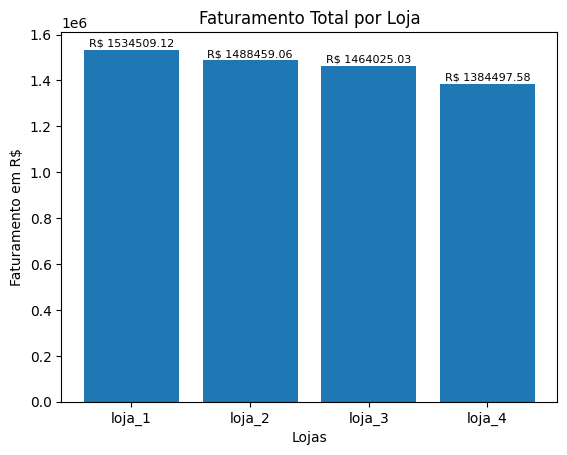

In [4]:
import matplotlib.pyplot as plt
nome_lojas = ['loja_1', 'loja_2', 'loja_3', 'loja_4']

# Use the store names as the x-axis values
plt.bar(nome_lojas, faturamento_lojas)
for i, v in enumerate(faturamento_lojas):
  plt.text(i, v + 15000, f'R$ {v}', ha='center', fontsize=8)

plt.xlabel('Lojas')  # Add label to the x-axis
plt.ylabel('Faturamento em R$')  # Add label to the y-axis
plt.title('Faturamento Total por Loja')  # Add a title to the chart
plt.show()



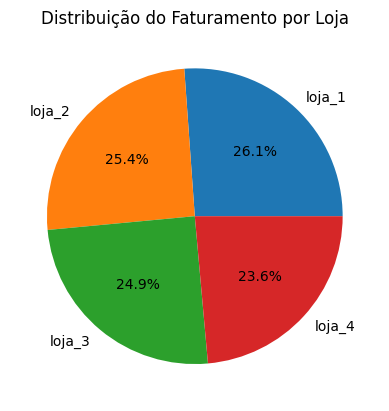

In [5]:
import matplotlib.pyplot as plt

# Criando o gráfico de pizza
plt.pie(faturamento_lojas, labels=nome_lojas, autopct='%1.1f%%')

# Adicionando título
plt.title('Distribuição do Faturamento por Loja')

# Exibindo o gráfico
plt.show()

# 2. Vendas por Categoria


In [71]:
#coluna_categoria = loja_1['Categoria do Produto']
total_categoria = loja_1.groupby('Categoria do Produto').size()
#print(coluna_categoria)
print(total_categoria)

Categoria do Produto
brinquedos               324
eletrodomesticos         312
eletronicos              448
esporte e lazer          284
instrumentos musicais    182
livros                   173
moveis                   465
utilidades domesticas    171
dtype: int64


In [73]:
categoria_mais_vendida = max(total_categoria)
print(categoria_mais_vendida)


465


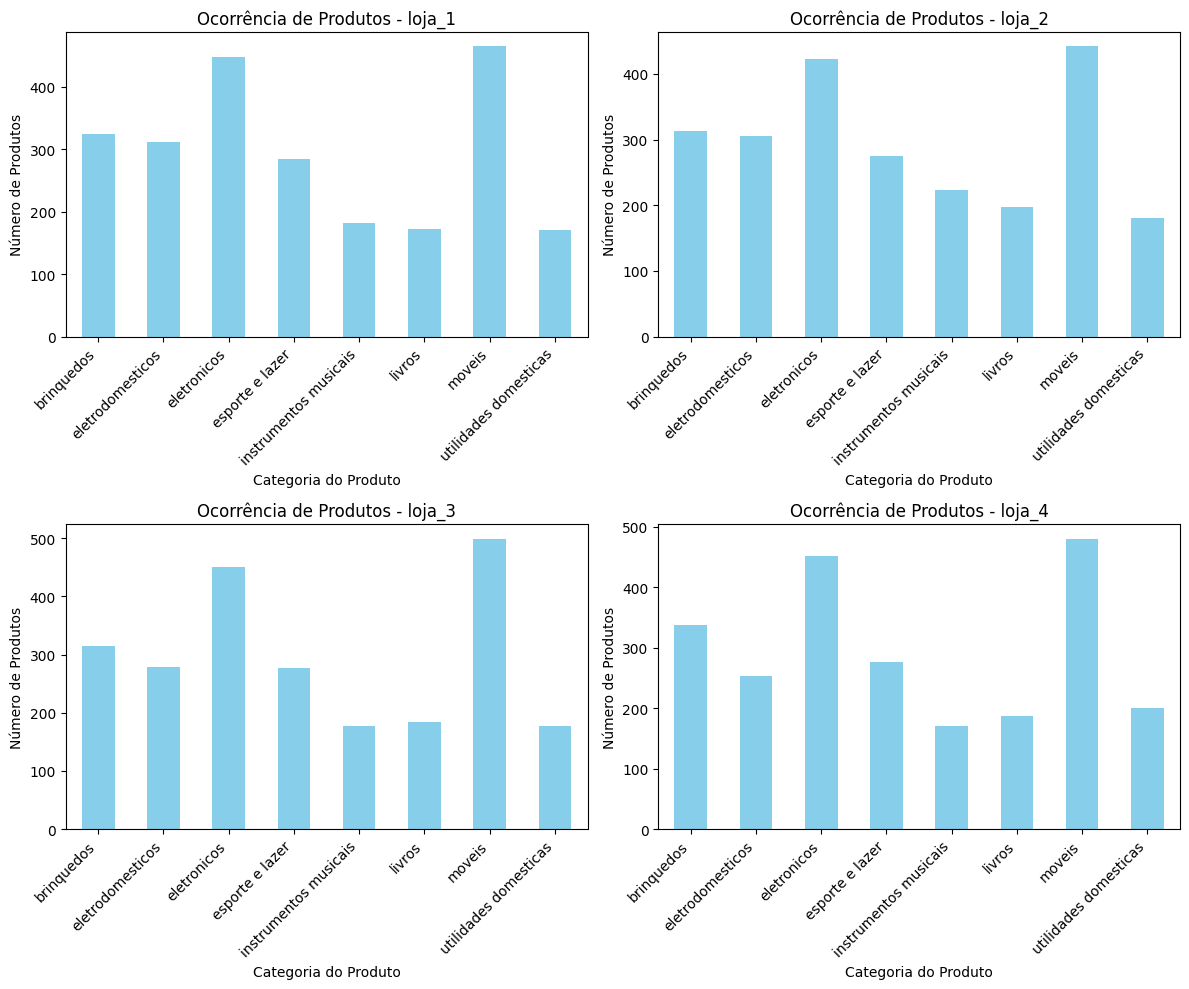

In [19]:
import matplotlib.pyplot as plt

# Criando uma figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 linhas e 2 colunas

# Iterando sobre as lojas e criando gráficos
for i, loja in enumerate(lojas):
    total_categoria = loja.groupby('Categoria do Produto').size()

    # Selecionando o subplot correspondente
    ax = axs[i // 2, i % 2]  # Calcula a posição do subplot
    total_categoria.plot(kind='bar', ax=ax, color='skyblue')

    # Adicionando título e rótulos
    ax.set_title(f'Ocorrência de Produtos - {nome_lojas[i]}')
    ax.set_xlabel('Categoria do Produto')
    ax.set_ylabel('Número de Produtos')
    ax.set_xticks(range(len(total_categoria)))  # Define os ticks do eixo x
    ax.set_xticklabels(total_categoria.index, rotation=45, ha='right')  # Rótulos do eixo x

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

# 3. Média de Avaliação das Lojas

In [21]:
medias_avaliacoes_lojas = [round(sum(i['Avaliação da compra'])/len(i['Avaliação da compra']),2) for i in lojas]
medias_avaliacoes_lojas

[3.98, 4.04, 4.05, 4.0]

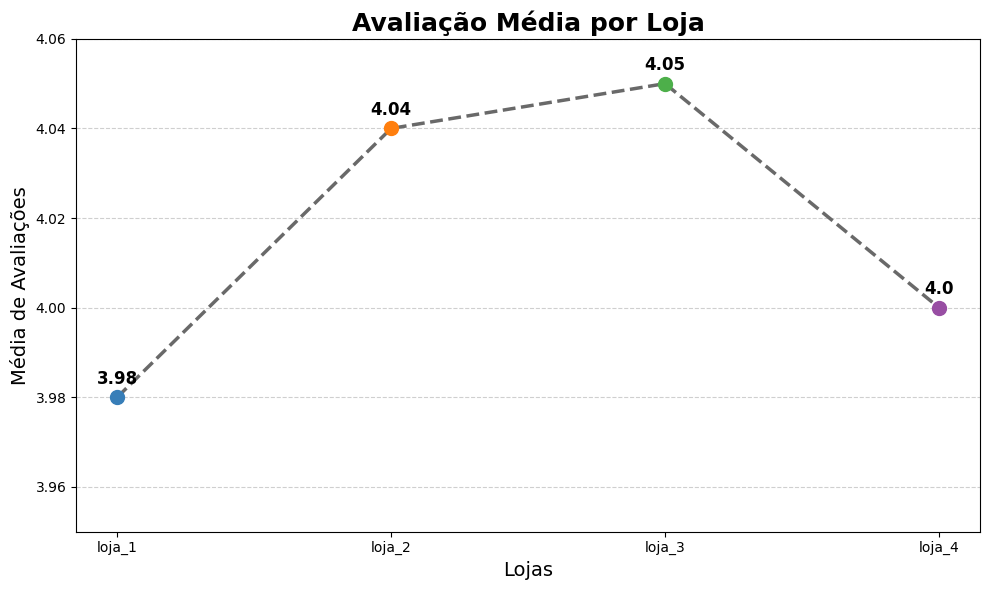

In [22]:
# Cores para os pontos
cores = ['#377eb8', '#ff7f0e', '#4daf4a', '#984ea3']
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(nome_lojas, medias_avaliacoes_lojas, marker='o', linestyle='--', linewidth=2.5, color='dimgray')

# Adicionando os pontos com cores individuais
for i in range(len(nome_lojas)):
    plt.scatter(nome_lojas[i], medias_avaliacoes_lojas[i], color=cores[i], s=100, zorder=3)
    plt.text(nome_lojas[i], medias_avaliacoes_lojas[i] + 0.003, f'{medias_avaliacoes_lojas[i]}', ha='center', fontsize=12, fontweight='bold')

# Título e rótulos
plt.title('Avaliação Média por Loja', fontsize=18, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Média de Avaliações', fontsize=14)

# Limites para deixar visual mais agradável
plt.ylim(3.95, 4.06)

# Grid para facilitar leitura
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout ajustado
plt.tight_layout()

# Exibir
plt.show()

# 4. Produtos Mais e Menos Vendidos

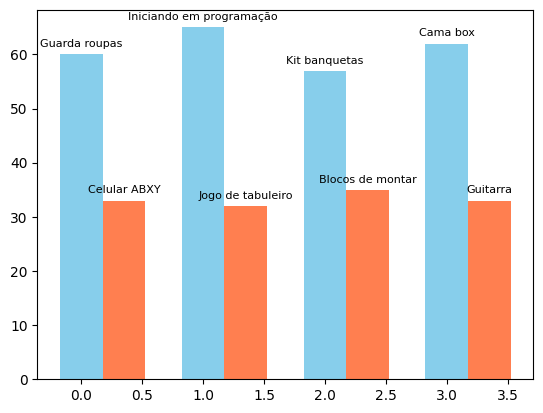

In [70]:
import matplotlib.pyplot as plt
nome_lojas = ['loja_1', 'loja_2', 'loja_3', 'loja_4']

# Listas para armazenar os totais de ocorrências
totais_mais_vendidos = []
totais_menos_vendidos = []

# Loop para calcular os totais de ocorrências
for loja in lojas:
    total_produto = loja.groupby('Produto').size()
    produto_mais_vendido = total_produto.idxmax()
    produto_menos_vendido = total_produto.idxmin()  # Encontra o produto menos vendido

    totais_mais_vendidos.append(total_produto[produto_mais_vendido])
    totais_menos_vendidos.append(total_produto[produto_menos_vendido])  # Armazena o total do menos vendido

# Largura das barras
largura_barra = 0.35

# Posições das barras no eixo x
posicoes_mais_vendidos = range(len(nome_lojas))
posicoes_menos_vendidos = [x + largura_barra for x in posicoes_mais_vendidos]

# Criação do gráfico de barras
fig, ax = plt.subplots()  # Cria a figura e os eixos

barras_mais_vendidos = ax.bar(posicoes_mais_vendidos, totais_mais_vendidos, width=largura_barra, label='Mais Vendidos', color='skyblue')
barras_menos_vendidos = ax.bar(posicoes_menos_vendidos, totais_menos_vendidos, width=largura_barra, label='Menos Vendidos', color='coral')

# ... (código para configurar rótulos dos eixos, título, etc.) ...

# Adiciona rótulos com o nome do produto acima das barras
def adicionar_rotulos(barras, produtos):
    for barra, produto in zip(barras, produtos):
        altura = barra.get_height()
        ax.text(barra.get_x() + barra.get_width() / 2, altura + 1, produto, ha='center', va='bottom', fontsize=8)

# Loop para obter os nomes dos produtos mais e menos vendidos
produtos_mais_vendidos = []
produtos_menos_vendidos = []
for loja in lojas:
    total_produto = loja.groupby('Produto').size()
    produtos_mais_vendidos.append(total_produto.idxmax())
    produtos_menos_vendidos.append(total_produto.idxmin())

adicionar_rotulos(barras_mais_vendidos, produtos_mais_vendidos)
adicionar_rotulos(barras_menos_vendidos, produtos_menos_vendidos)

plt.show()

# 5. Frete Médio por Loja


In [26]:
frete_medio_lojas = [round(sum(i['Frete'])/len(i['Frete']),2) for i in lojas]
frete_medio_lojas

[34.69, 33.62, 33.07, 31.28]

In [41]:
frete_total_lojas = [[i, round(sum(loja['Frete']), 2)] for i, loja in zip(nome_lojas, lojas)]
frete_total_lojas

[['loja_1', 81837.97],
 ['loja_2', 79314.16],
 ['loja_3', 78022.66],
 ['loja_4', 73755.88]]

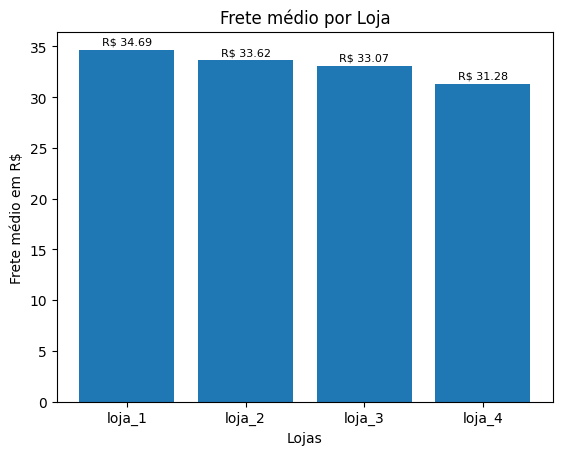

In [34]:
import matplotlib.pyplot as plt
nome_lojas = ['loja_1', 'loja_2', 'loja_3', 'loja_4']

# Use the store names as the x-axis values
plt.bar(nome_lojas, frete_medio_lojas)
for i, v in enumerate(frete_medio_lojas):
  plt.text(i, v + 0.5, f'R$ {v}', ha='center', fontsize=8)

plt.xlabel('Lojas')  # Add label to the x-axis
plt.ylabel('Frete médio em R$')  # Add label to the y-axis
plt.title('Frete médio por Loja')  # Add a title to the chart
plt.show()